In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2021-05-29 14:37:13--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 34.64.4.80, 34.64.4.48, 34.64.4.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|34.64.4.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  27.4MB/s    in 8.6s    

2021-05-29 14:37:22 (22.3 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2021-05-29 14:37:22--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 34.64.4.16, 34.64.4.112, 34.64.4.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|34.64.4.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/rps-

In [2]:
import os
import zipfile

In [4]:
local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [5]:
local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [6]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

In [7]:
print('Total Training Rock Images:', len(os.listdir(rock_dir)))
print('Total Training Paper Images:', len(os.listdir(paper_dir)))
print('Total Training Scissor Images:', len(os.listdir(scissors_dir)))

Total Training Rock Images: 840
Total Training Paper Images: 840
Total Training Scissor Images: 840


In [8]:
rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

['rock04-061.png', 'rock05ck01-041.png', 'rock06ck02-019.png', 'rock03-102.png', 'rock07-k03-030.png', 'rock03-081.png', 'rock03-012.png', 'rock04-095.png', 'rock02-013.png', 'rock03-083.png']
['paper04-031.png', 'paper05-110.png', 'paper07-109.png', 'paper05-017.png', 'paper06-032.png', 'paper03-023.png', 'paper02-090.png', 'paper06-104.png', 'paper01-002.png', 'paper06-096.png']
['scissors04-048.png', 'testscissors02-020.png', 'scissors02-060.png', 'testscissors03-060.png', 'testscissors03-010.png', 'scissors03-061.png', 'scissors01-016.png', 'scissors01-017.png', 'testscissors03-047.png', 'scissors01-014.png']


In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

In [12]:
next_rock = [os.path.join(rock_dir, fname)
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname)
                 for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname)
                    for fname in scissors_files[pic_index-2:pic_index]]

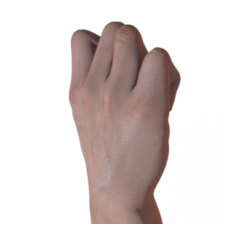

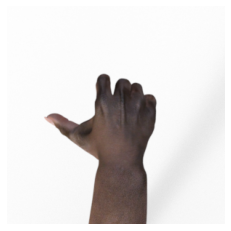

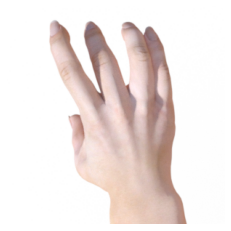

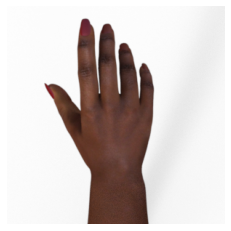

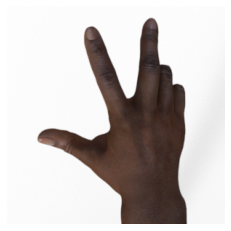

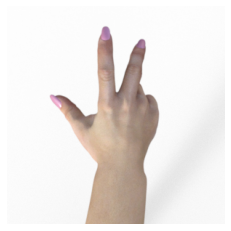

In [13]:
for i, img_path in enumerate(next_rock + next_paper + next_scissors):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

In [14]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [15]:
TRAINING_DIR = "/tmp/rps"
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [16]:
VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
training_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 126
)

Found 2520 images belonging to 3 classes.


In [18]:
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 126
)

Found 372 images belonging to 3 classes.


In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [20]:
model.summary()
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy'],
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [24]:
history = model.fit(
    training_generator,
    epochs = 25,
    steps_per_epoch = 20,
    validation_data = validation_generator,
    verbose = 1
)

Epoch 1/25
20/20 [==============================] - 35s 2s/step - loss: 1.9225 - accuracy: 0.3524 - val_loss: 1.0853 - val_accuracy: 0.4328
Epoch 2/25
20/20 [==============================] - 34s 2s/step - loss: 1.0891 - accuracy: 0.3876 - val_loss: 1.0636 - val_accuracy: 0.5323
Epoch 3/25
20/20 [==============================] - 34s 2s/step - loss: 1.0462 - accuracy: 0.4695 - val_loss: 0.5531 - val_accuracy: 0.7957
Epoch 4/25
20/20 [==============================] - 34s 2s/step - loss: 1.0909 - accuracy: 0.5674 - val_loss: 0.4889 - val_accuracy: 0.8978
Epoch 5/25
20/20 [==============================] - 34s 2s/step - loss: 0.7366 - accuracy: 0.6615 - val_loss: 0.3355 - val_accuracy: 0.8871
Epoch 6/25
20/20 [==============================] - 34s 2s/step - loss: 0.8115 - accuracy: 0.6607 - val_loss: 0.5025 - val_accuracy: 0.6882
Epoch 7/25
20/20 [==============================] - 34s 2s/step - loss: 0.6396 - accuracy: 0.7220 - val_loss: 0.2325 - val_accuracy: 0.9839
Epoch 8/25
20/20 [==

In [25]:
model.save("rps.h5")

In [26]:
import matplotlib.pyplot as plt

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [28]:
epochs = range(len(acc))

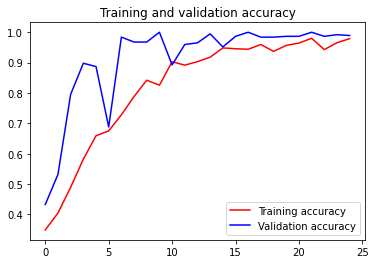

<Figure size 432x288 with 0 Axes>

In [29]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()